<a href="https://colab.research.google.com/github/Borja-Hoyos/Text_Minning/blob/main/TecnicasNLP_master_alumnos_referencia_hacer_copia_antes_de_usar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas Básicas de NLP en el Text Mining

Aquí se muestran los códigos en las tres herramientas mostradas p........

En primer lugar, instalamos las librerías de programación a utilizar:
- **NLTK**: Descargamos la librería y complementos necesario
- **Spacy**: Descargamos la librería y los modelos pre-entretados *en_core_web_sm* y *es_core_web_sm*, modelos de DNN entrenados con noticias, blogs y comentarios en inglés y español respectivamente.
- **Gensim**: Descargamos la librería Gensim del repositorio oficial.

In [ ]:
# Instalamos nltk
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
# Instalamos spacy y uno de sus modelos
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm
# Instalamos textacy
!pip install textacy
# Descargamos datos del repositorio de github
!wget "https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/news_summary.csv"

# Librerías tpipicas
import pandas as pd


## Corpus y corpora



Todo proceso de análisis textual comienza con un dataset de documentos textuales, que generalmente se llama **corpus** o *corpora* cuando tratamos con varios datasets. El corpus generalmente está compuesto de texto bruto con algunos metadatos asociados, aunque esto no tiene por qué ser así. 

En este Notebook vamos a trabajar con un corpus de noticias distribuido en la plataforma Kaggle llamado [*News summary*](https://www.kaggle.com/sunnysai12345/news-summary). Este corpus está distribuido en formato *csv*, sin embargo es normal encontrar corpus con el formato *tsv*, o disponer de corpus almacenados en base de datos como MongoDB.

En primer lugar lo leeremos de la ruta donde se ha descargado `/content/news_summary.csv`:


In [ ]:
news_summary = pd.read_csv('../content/news_summary.csv', encoding='latin-1')
news_summary.head(3)

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...


El dataset está compuesto por un conjunto de filas, que llamamos documentos. Cada documento tiene un conjunto de metadatos como el autor, la fecha, el titular de la noticia y la web de la noticia y el texto asociado a esta. 

Cada uno de los textos puede separarse en párrafos, frases y palabras según el tipo de documento y el tipo de análisis que se le vaya a aplicar. 

En este caso, al ser un ejercicio, únicamente vamos a trabajar con el texto de los documentos, correspondiente el campo "text", así que extraeremos y transformaremos esta columna en una lista para trabajar más comodos:


In [ ]:
# Transformar la columna "text" a una lista
texto_noticias = _____________________________
print(type(texto_noticias))

<class 'list'>


Vamos a mirar el número de noticias que contiene nuestro corpus:

In [ ]:
print("El corpus news_summary contiene un total de {} documentos".format(_______________))

El corpus news_summary contiene un total de 4514 documentos


## Tokenización

El texto bruto está compuesto por una secuencia de caracteres. Antes de su análisis los textos son divididos en fragmentos más pequeños conocidos como tokens. Un token puede ser tanto una palabra, como un símbolo de puntuación, un número o un emoticono, en el caso de estar analizando datos de redes sociales.

El proceso de división del texto en tokens se llama tokenización. Aquí se muestra el proceso tanto para la librería Spacy como para la librería NLTK para un único texto del corpus.

***NLTK***

El tokenizador estándar de NLTK se llama word_tokenize. Podemos ver más información dentro de la web de documentación de NLTK (dentro del módulo word_tokenize [texto del enlace](https://www.nltk.org/api/nltk.tokenize.html))


También podemos utilizar la línea de código `?libreria.modulo.funcion` para que nos aparezca la ayuda de la función en la parte derecha de la pantalla.

In [ ]:
?nltk.tokenize.word_tokenize


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# Cogemos un subset de las 100 primeras noticias para acelerar el proceso:
subset_noticias = ________________________

In [ ]:
# Segmentar las frases de la noticia 5 (indice 4)
sentences = sent_tokenize(_______________)
for num,sentence in enumerate(sentences):
    print('La oración número {} es: \n {}'.format(num, sentence))

Podemos segmentar todos los tokens de un documento de forma global.

In [ ]:
# Segmentar los tokens de la noticia 5 (indice 4)
tokens = word_tokenize(__________________)
for num,token in enumerate(tokens):
    print('El token {} es {} '.format(num,token))

Pero también se puede segmentar los tokens de cada una de las frases separadamente:

In [ ]:
# Segmentar las frases de la noticia 5 (indice 4)
sentences = sent_tokenize(subset_noticias[4])
for num_sen, sentence in enumerate(sentences):
  # Segmentar los tokens de las frases de la noticia 5 (indice 4)
  tokens = word_tokenize(sentence)
  for num_token, token in enumerate(tokens):
    print("El token {} de la frase {} es: {}".format(num_token, num_sen,token))

***Spacy***

En Spacy el funcionamiento es algo distinto:
En primer lugar es necesario cargar un objeto spacy pre-entrenado proporcionado por los creadores de la librería (o por cualquier otro usuario que lo haya compartido). 

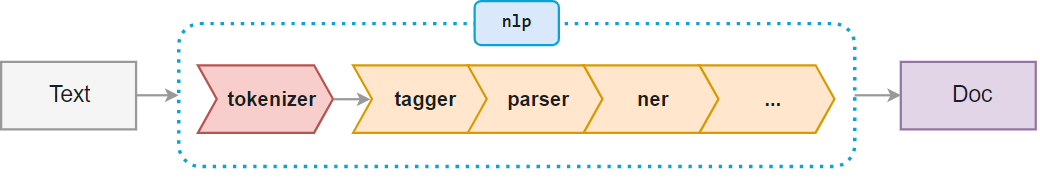
Los modelos incorporados con Spacy se pueden encontrar en su[ web](https://spacy.io/usage/facts-figures#benchmarks). Estos objetos permiten procesar documentos completos y extraer información de ellos como los tokens, PoS, o lemmas.

En primer lugar cargamos el modelo:

In [ ]:
import spacy
# Cargamos el modelo preentrenado con textos en inglés ("en_core_web_sm")
nlp=spacy.load(_____________)

A continuación, vamos a coger el mismo subset de noticias y vamos a aplicar el objeto nlp creado anteriormente a cada uno de los documentos

In [ ]:
# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]
# Obtener una lista de objetos de tipo spacy procesados por spacy
documento = nlp(subset_noticias[0])
type(documento)

In [ ]:
# Obtenemos la lista de docuimentos procesados por el objeto nlp de spacy
lista_documentos = [ _______ for noticia in subset_noticias]

In [ ]:
type(lista_documentos[0])

spacy.tokens.doc.Doc


Esto ha transformado nuestros textos a objetos de tipo [`spacy.tokens.doc.Doc`](https://spacy.io/api/doc) que tiene una serie de atributos y métodos útiles para nuestro pipeline.

Como hemos hecho antes, en primer lugar vamos a extraer las frases del documento 4.


In [ ]:
# Segmentamos el texto de la noticia 4 en oraciones:
for num,sentence in enumerate(lista_documentos[4].sents):
    print('La oración número {} es: \n {}'.format(num, sentence))

Vamos a mostrar los tokens de cada una de las frases.


In [ ]:
# Además también podemos dividir cada frase en tokens para la noticia 4:
for num,sentence in enumerate(lista_documentos[4].sents):
    print('La oración {} tiene {} tokens'.format(num, len(sentence)))
    tokens=[word for word in sentence]
    print(tokens)

## Unigramas, Bigramas y N-gramas

En ocasiones, la información proporcionada por un token no es suficiente. 

Existen palabras que tienen relación con los términos previos y/o posteriores. Desde un punto de vista *naive*, la manera de conseguir el contexto de cada palabra es mediante los n-gramas.

Los n-gramas son secuencias de n tokens consecutivos provenientes de un texto. La combinación de n-gramas puede proporcionar información sobre la temática de un texto. Generalmente se generan unigramas, que son iguales que los tokens del texto. Los Bigramas, que son combinaciones pareadas de tokens y los trigramas que son triadas de tokens 

***NLTK***

En NLTK los ngrams se consiguen a traves de un método dentro del módulo util de la librería.

In [ ]:
from nltk.util import ngrams
?ngrams

Vamos a generar una función para crear n-grams de distinto tamaño!

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.util import ngrams
# Función para extraer n-grams de una frase.
def extraer_ngramas(datos, numero):
    # Uso Utilizar la función ngrams para generar ngrams de textos 
    n_grams = _____________________________
    # Transformo el resultado en una lista
    return [ ' '.join(grams) for grams in n_grams]

Ahora vamos a generar un conjunto de bigramas, trigramas y 4-gramas de la noticia 4:

In [ ]:

# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]

# Calculamos los bigramas, trigramas y 4 gramas de la noticia 4
print("Unigramas: ", extraer_ngramas(subset_noticias[4],1))

In [ ]:
# Calculamos los bigramas, trigramas y 4 gramas de la noticia 4
print("Bigramas: ", _____________________________)
print("Trigramas: ", _____________________________)
print("4-gramas: ", _____________________________)

***Spacy***

Spacy no tiene actualmente integrado esta funcionalidad, así que utilizaremos una librería auxiliar que funciona con sus clases, llamada textacy.

Primero, importamos las librerías, el modelo en inglés y como antes, procesamos con el modelo los documentos:

In [ ]:
import spacy
import textacy

# Cargamos el modelo preentrenado con textos en inglés "en_core_web_sm"
nlp=spacy.load(____________)
# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]
# Creamos un objeto spacy nlp con los textos para que sea preprocesado con el modelo anterior
nlp_texto = [_____________________ for texto_to_process in subset_noticias]

Utilizaremos la librería textacy para extraer esta información:

In [ ]:
 # Calculamos los bigramas, trigramas y 4 gramas de la noticia 4
print("Bigramas: ", list(textacy.extract.ngrams(nlp_texto[4],2, min_freq=1, filter_stops = False, filter_punct =False)))


In [ ]:
# Calculamos los trigramas y 4 gramas de la noticia 4
print("Trigramas: ", _________________________________)
print("4-gramas: ", _________________________________)


**Visualización:**

A continuación, vamos a calcular los tokens y bigramas de todo el corpus de documentos y vamos a generar una visualización.


In [ ]:
def frecuencia_tokens(lista): 
    # Creamos diccionario vacío 
    frecuencia = {} 
    for item in lista: 
        if (item in frecuencia): 
            frecuencia[item] += 1
        else: 
            frecuencia[item] = 1
    return frecuencia

In [ ]:
# Extraermos los tokens de todos los textos y los introducimos en una lista común:
lista_tokens = list()
for i in subset_noticias:
  # Tokenizamos cada documento con word_tokenize()
  tokens_document = _____________________
  # Añadimos esos tokens como nuevos elementos
  # Si usamos append se crearía una lista de listas, de este modo añadimos los
  # Elementos de la segunda lista
  lista_tokens.extend(tokens_document)

# Calculemos la frecuencia
dict_freq = frecuencia_tokens(lista_tokens)


Vamos a ordenar el diccionario, para tomar sólo los valores mayores de 20:

In [ ]:
# Ordenamos el diccionario por la frecuencia de sus palabras
dict_freq_order = sorted(dict_freq.items(), key=lambda x: x[1], reverse=True)
token_names = list()
token_freqs = list()
for i in dict_freq_order:
  if i[1] > 30:
    token_names.append(i[0])
    token_freqs.append(i[1])


Dibujemos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
sns_g = sns.barplot(x=token_names, y=token_freqs)
plt.xticks(rotation=45)

Se podrían quitar los símbolos de puntuación y stopwords con:


```
import string
from nltk.corpus import stopwords
punctuations = string.punctuation
stop_words = stopwords.words('english')
```




## Lematización y stemming


Las lemas son las formas canónicas del léxico de un idioma. Por ejemplo, en el caso del español, los verbos presentan una flexión verbal, conocida como comúnmente como conjungación, utilizada para adaptar el verbo a diferentes situaciones de contexto (número, género y tiempo verbal) y presentando distinta forma escrita. En algunas ocasiones, es útil utilizar el lema de los verbos y otras palabras para reducir la dimensionalidad en los modelos predictivos. Este proceso es conocido como lematización. Cuando se lematiza se obtienen palabras reales ya que se utilizan diccionarios jerárquicos para obtener el lema. Este diccionario jerárquico es conocido como WordNet, y será explicado con profundidad más adelante.

Un caso específico y simple de la lematización es el stemming, que consiste en utilizar reglas sintácticas para quitar la finalización de las palabras y reducirlas así una forma común llamada stem. Hay muchos stemmers populares como el de Porter o el de Snowball. **Es importante mencionar que no siempre que se hace stemming de una palabra esta es una palabra real, si no una palabra sin su última(s) letras**

A continuación se muestran ests procesos tanto para NLTK como para Spacy:

***NLTK***

**Stemming**

En NLTK hay varias implementaciones de algoritmos de Stemming. Aquí mostraremos los dos más utilizados: 

- Algoritmo de Porter Stemming: Algoritmo que solo funciona en inglés y que funciona correctamente con la mayoría de las palabras en ese idioma. Sirve para quitar sustituir los sufijos de las plabras.

- Algoritmo de SnowballStemmer: Algoritmo de Stemming que soporta 13 lenguas en NLTK, incluyendo español. Es una versión mejorada del algoritmo de de Porter Stemming.


In [ ]:
# Importamos las librerías
from nltk import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer

In [ ]:
# In English
list_of_english_words = ["Speaking","speaks","Speaker","dogs","buses", "pieces",'compute', 'computer', 'computed', 'computing']
SStemmer = PorterStemmer()
PStemmer = SnowballStemmer("english")

In [ ]:
# Imprimos los stems
print("Términos en inglés:")
for word in list_of_english_words:
  print("Palabra original: {}, Porter Stemmer: {}, Snowball: {}".format(word,PStemmer.stem(word),SStemmer.stem(word)))



In [ ]:
#En español
lista_de_palabras_espano = ["Hablando", "Habla", "Hablador", "Hablará", "ha hablado"]

SStemmer_spanish = _________________________
print("Términos en español:")
for word in lista_de_palabras_espano:
  print("Palabra original: {}, Snowball: {}".format(___________________________________))


**Lematización**

En español no se puede utilizar este método, dado que WordNet solo tiene términos en inglés. 
En este ejemplo vamos a lematizar palabras individuales, sin una categoría gramatical asignada. Si tuvieramos la PoS funcionaría con mejor rendimiento.


In [ ]:
from nltk.stem import WordNetLemmatizer

lematizador = WordNetLemmatizer()
list_of_english_words = ["Speaking","speaks","Speaker","dogs","buses", "pieces",'compute', "computes", 'computer', 'computed', 'computing']
for word in list_of_english_words:
  print(" {} ---> {}".format(word,lematizador.lemmatize(word)))


Notesé que, a diferencia del stemmer, las palabras en plural que no se forman solo con una s y que se producían errores, aquí lo hace sin problemas.

***Spacy***

Debido al funcionamiento de Spacy, que funciona con modelos pre-entrenados de DeepLearning que incorporan distintas características, no existen funciones para hacer stemming y si para lematizar. Este proceso lo hace a partir de los conocimientos adquiridos en el proceso de entrenamiento del modelo con millones de textos.

In [ ]:
import spacy

# Cargamos el modelo preentrenado con textos en inglés
nlp=spacy.load('en_core_web_sm')

english_sentence = "I bought five tickets on the internet, after a long wait 5 buses passed by, but none of them was the correct one"

word_sp = nlp(english_sentence)
for word in word_sp:
  print(word.text, "---->", word.lemma_)

## Part-Of-Speech Tagging

El *Part-Of-Speech Tagging* o la asignación de categorías gramaticales a una frase es el proceso en el que a una lista de palabras es etiquetada con su categoría gramatical, es decir que identifica si la palabra es un nombre, un adjetivo, un verbo, un adverbio, etc.

La asignación de etiquetas gramaticales es interesante cuando se quiere hacer análisis gramatical de una oración, para saber si una palabra tiene una acepción u otra, o incluso para extraer características artificiales cuando se quiere hacer una clasificación textual o similar.


**NLTK**

El listado de etiquetas de NLTK es el utilizado por UPenn (University of Pennsylvania). Para ver el listado completo solo hay que ejecutar la siguiente línea de código:


```
nltk.help.upenn_tagset()
```



In [ ]:
nltk.help.upenn_tagset()

In [ ]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]


# Segmentamos los tokens
tokens = ______________________________________________

# Utilizamos la función pos_tag() de nltk para obtener las etiquetas
pos_tag(tokens)

**Spacy**

El listado de etiquetas POS utilizadas en Spacy es el siguiente:



```
SPACY_POS_LIST = ["ADJ", "ADP", "ADV", "AUX", "CONJ", "CCONJ",
                  "DET", "INTJ", "NOUN", "NUM", "PART", "PRON", 
                  "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X", "SPACE"]
```

Si se necesita recordar que significa una de las abreviaciones se puede utilizar el código:

```
spacy.explain("NN")
# 'noun, singular or mass'
```




In [ ]:
spacy.explain("NP")

'noun phrase'

In [ ]:
# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]


# Segmentamos los tokens
tokens = nlp(subset_noticias[4])
for w in tokens:
    print( "The word '{}' is a {} ".format(w.text, w.pos_))

## Named-entiy recognition

La extración de entidades de un documento es una labor esencial en la análitica de textos. En algunas ocasiones puede ser interesante si se nombra a una persona, a una ciudad, un país o incluso a un medicamento, en el caso de los textos clínicos. 

Existen sistemas NER (Named-entity recognition) específicos para cada campo de aplicación. Las librerías de NLTK y Spacy disponen de modelos para detectar entidades de ámbito general, aunque existen modelos mucho más espcificos para reconocer entidades muy específicos como por ejemplo síntomas en textos clinicos (mención a BSC).

**NLTK**

En NLTK antes de detectar es necesario la obtención de la tokenización y la POS tag antes de identificar entidades, ya que utiliza las etiquetas POS y reglas internas para encontrar que elementos son personas u otro tipo de entidad. 

Cuando los textos son extraidos de internet, hay que quitar los espacios extras que puede haber en una frase, para que se extraiga mejor las categorías gramaticales de éstos y poder así reconocer mejor las organizaciones o personas en el texto. En este caso están bastante limpios, así que no hace falta hacerlo. 

Importamos la función `ne_chunk`, que necesita un conjunto de tokens etiquetados PoS previamente. Así que antes hay que preprocesar el documento. Lo haremos con la función `preprocesar()`

In [ ]:
from nltk.chunk import ne_chunk
?ne_chunk
subset_noticias = texto_noticias[0:100]


In [ ]:
def preprocess(documento):
  # word_tokenizer
  documento_tok = ___________________________
  # pos_tag tokens
  documento_pos = _________________
  return documento_pos

Ejecutemos la función sobre la noticia con índice 4 y extraigamos las named-entities:

In [ ]:
noticia = ____________________________
noticia

In [ ]:
ne_tree = ne_chunk(noticia)
print(ne_tree)

**Spacy**

En Spacy es mucho más sencillo. Cuando procesamos un documento con el modelo importado, automáticamente se le aplica un conjunto de instrucciones internamente para detectar tokens, lemas... y también las entidades nombradas, a las que se puede acceder iterando sobre el atributo `ents` y extrayendo la etiqueta.

In [ ]:
# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]

# Segmentamos los tokens
tokens = nlp("John was born in Chicken, Alaska, and studies at Cranberry Lemon University. John likes to go to Starbucks.")
print([(X.text, X.label_) for X in tokens.ents])

[('John', 'PERSON'), ('Chicken', 'GPE'), ('Alaska', 'GPE'), ('Cranberry Lemon University', 'ORG'), ('John', 'PERSON'), ('Starbucks', 'ORG')]


Además, spacy incorpora un módulo para visualizar estas entidades en un gráfico. 

In [ ]:
from spacy import displacy
displacy.render(tokens, jupyter=True, style='ent')


## Estructura de la frase

In [ ]:
from spacy import displacy
tokens = nlp("John was born in Chicken, Alaska, and studies at Cranberry Lemon University. John likes to go to Starbucks.")
displacy.render(tokens,style='dep',jupyter=True)

## WordNet

WordNet 3.0 es un diccionario jerárquico desarrollado por la Universidad de Princeton, que categoría las acepciones de todas las palabras del inglés en relaciones semánticas con otras.

Se puede acceder fácilmente a Wordnet utilizando NLTK mediante la función wordnet del módulo corpus.

Por ejemplo, busquemos la palabra "bank":

In [ ]:
from nltk.corpus import wordnet
syn = wordnet.synsets("bank")
print(syn)

Al mostrar los synsets de esa palbra se observa que hay varios que contienen la palabra bank. 
Vamos a mostrar la definición y ejemplos de uso de alguno de ellos:



In [ ]:
print("bank.n.01 definition: " + syn[0].definition())
print(syn[0].examples())

print("bank.n.04 definition: " + syn[5].definition())
print(syn[5].examples())


Se pueden buscar la distancia exitente entre los synsets para intentar comprender su similitud semántica:

In [ ]:
from nltk.corpus import wordnet

dog = wordnet.synset('dog.n.01')
cat = wordnet.synset('cat.n.01')
fox = wordnet.synset('fox.n.01')

print("path similarity between dog and cat: ",dog.path_similarity(cat))
print("path similarity between dog and fox: ",dog.path_similarity(fox))
print("path similarity between cat and fox: ",cat.path_similarity(fox))


path similarity between dog and cat:  0.2
path similarity between dog and fox:  0.3333333333333333
path similarity between cat and fox:  0.2


## Embeddings

Es interesante saber cargar embeddings pre-entrenados. En la clase de mañana utilizaremos embeddings para ayudar a sistemas de análisis de sentimiento, así que vamos a aprender a cargarlos hoy. [LINK](https://nlp.stanford.edu/projects/glove/)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
# Unzip


--2021-06-04 13:58:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-04 13:58:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-04 13:58:39--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip
# Get the path of the zip
!ls
!pwd

In [ ]:
# Librerías tpipicas
import pandas as pd
import numpy as np
def cargaGlove(gloveFile):
    print("Cargando modelo Glove")
    f = open(gloveFile,'r')
    modelo = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        modelo[word] = embedding
    print("Finalizado.",len(modelo)," palabras")
    return modelo


In [ ]:
glove_model = cargaGlove("/content/glove.6B.100d_1.txt")

In [ ]:
rana = glove_model["frog"]
print(rana)
lagarto = glove_model["lizard"]
print(lagarto)
perro = glove_model["dog"]
print(perro)
libro = glove_model["book"]
print(libro)
humano = glove_model["person"]
print(humano)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity([rana],[lagarto]))
print(cosine_similarity([rana],[perro]))
print(cosine_similarity([rana],[libro]))
print(cosine_similarity([humano],[perro]))
print(cosine_similarity([humano],[rana]))

In [ ]:
print(glove_model["sad"])
print(glove_model["happy"])